In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt

Found 7200 files belonging to 24 classes.


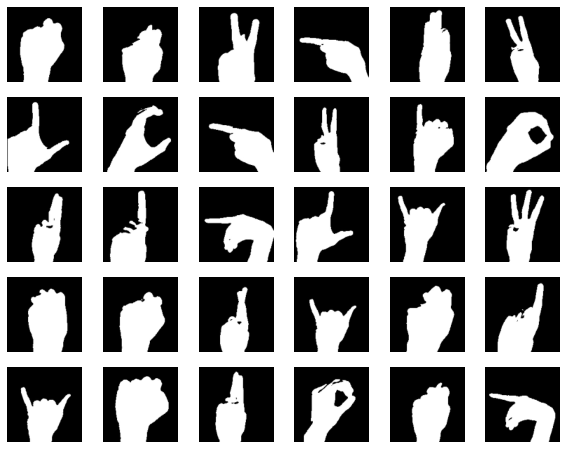

In [4]:
IMAGE_SIZE = 128
def getDataset(path):
    return tf.keras.preprocessing.image_dataset_from_directory(
        path,
        labels='inferred',
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        color_mode='grayscale',
    )

# Construct the Columbia datasets
data = getDataset('../data/created_dataset')

test = data.take(1).__iter__().get_next()[0]
fig=plt.figure(figsize=(10, 8))
columns = 6
rows = 5
for i in range(1, columns*rows +1):
    img = test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

train = data.take(150)
test = data.skip(150)

In [20]:
l = [
    layers.experimental.preprocessing.Rescaling(1./127.5, offset=-1, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),

    layers.Conv2D(16, 5, activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    
    layers.Conv2D(16, 5, activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    
    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(24, activation='softmax')
]

model = tf.keras.Sequential(l)
model.summary()

NameError: name 'Conv2D' is not defined

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)
model.evaluate(test)
model.fit(train, validation_data=test, epochs=10)

InvalidArgumentError:  Incompatible shapes: [32,1] vs. [32,29,29]
	 [[node Equal (defined at <ipython-input-19-d14f5ed8009c>:6) ]] [Op:__inference_test_function_7516]

Function call stack:
test_function
